In [216]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [217]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as com

In [223]:
### Load Graphs
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_dolphins = nx.read_gml(data_base_path + "graph_dolphins.gml")
G_dolphins_rnd = nx.read_gml(data_rnd_base_path + "graph_dolphins_random.gml")

In [224]:
def find_community_gm(G):
    colour = ['red', 'green', 'blue', "gold", "violet", "orange"]
    colour_map = []
    gm = com.greedy_modularity_communities(G)
    for node in G.nodes():
        for i in range(0, len(gm)):
            if node in gm[i]:
                colour_map.append(colour[i])
    
    nx.draw(G, node_color = colour_map)
    return len(gm)

4

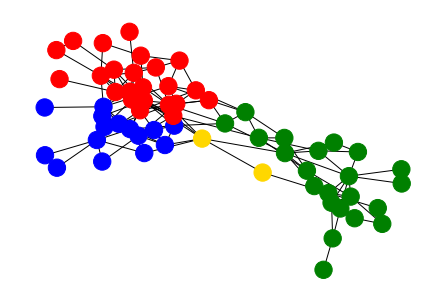

In [225]:
find_community_gm(G_dolphins)

In [226]:
def find_community_lp(G):     
    colour = ['red', 'green', 'blue', "gold", "violet", "orange"]
    colour_map = []
    lp = com.label_propagation_communities(G)
    for node in G.nodes():
        for i in range(0, len(lp)):
            if node in list(lp)[i]:
                colour_map.append(colour[i])
    
    nx.draw(G, node_color = colour_map)
    return len(lp)

6

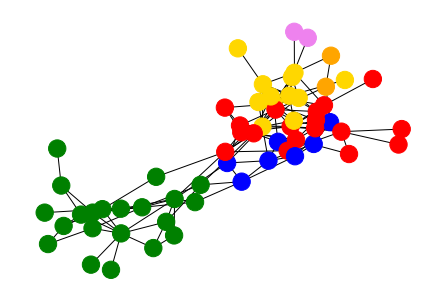

In [227]:
find_community_lp(G_dolphins)

In [232]:
def compare_communities(G, G_rnd):
    plt.figure(1)
    G_gm = find_community_gm(G)
    plt.figure(2)
    G_rnd_gm = find_community_gm(G_rnd)
    
    plt.figure(3)
    G_lp = find_community_lp(G)
    plt.figure(4)
    G_rnd_lp = find_community_lp(G_rnd)
    
    print("Number of communities by using greedy modularity maximization before randomisation:", G_gm)
    print("Number of communities by using greedy modularity maximization after randomisation:", G_rnd_gm)
    print("Number of communities by using label propagation algorithm before randomisation:", G_lp)
    print("Number of communities by using label propagation algorithm after randomisation:", G_rnd_lp)

Number of communities by using greedy modularity maximization before randomisation: 4
Number of communities by using greedy modularity maximization after randomisation: 6
Number of communities by using label propagation algorithm before randomisation: 6
Number of communities by using label propagation algorithm after randomisation: 1


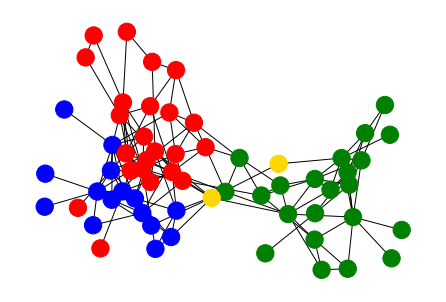

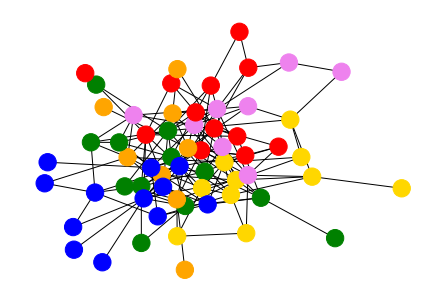

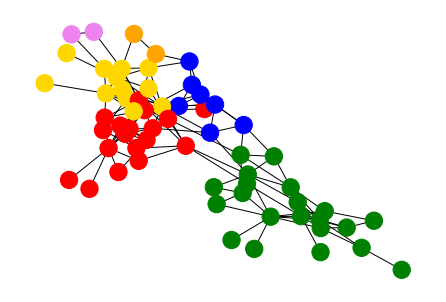

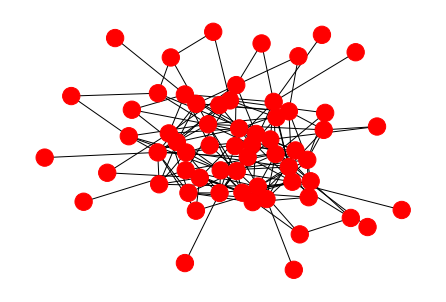

In [233]:
compare_communities(G_dolphins, G_dolphins_rnd)